In [1]:
import pandas as pd
import os
import soundfile as sf           
import numpy as np               
import matplotlib.pyplot as plt  
from scipy.signal import welch   
from scipy.io import wavfile
import scipy.signal as sps
import librosa
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

from sampling import module_functions
from IPython.display import Audio
from IPython import display

import torch.nn as nn
import torchvision
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as Fu
from module import org_fft_codes
from module import tools_functions
import io

In [2]:
_SAMPLE_DIR_AUD  = "audio_data"
audio_path = os.path.join(_SAMPLE_DIR_AUD, "sandy-beach.wav")
os.makedirs(_SAMPLE_DIR_AUD, exist_ok=True)

_SAMPLE_DIR_IMG  = "image_data"
img_path = os.path.join(_SAMPLE_DIR_IMG, "set_up.png")
os.makedirs(_SAMPLE_DIR_IMG, exist_ok=True)

# Procesamiento básico de imágenes y audio

+ Nuestros dos sentidos más importantes son la <span style="color:red">visión</span> y la <span style="color:red">audición</span>.

+ Curiosamente, muchas veces al explicar el procesamiento de audio, hacemos directa relaciòn con el procesamiento de <span style="color:red">imágenes</span>.

+ En la vida real, ambos sentidos funcionan de manera combinada.


## Observemos la siguiente escena de un paisaje de playa de arena

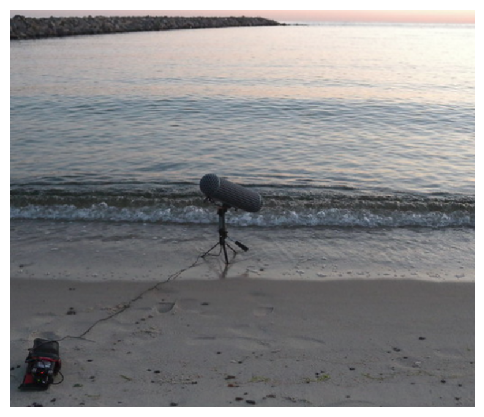

In [3]:
image = Image.open(img_path).convert('RGB')

plt.figure(figsize=[6, 6])
plt.imshow(image)
plt.axis('off');

## Qué sensación les da la escena visual? 

> Qué objetos se observan en ese espacio?

En general, una <span style="color:red">señal</span> es una descripción de cómo un `parámetro` depende de otro parámetro. Por ejemplo, en un circuito eléctrico, una señal de voltaje nos indicaría cómo ese voltaje varía con el tiempo. O en una imagen, una señal de brillo nos indicaría cómo ese brillo varía con la distancia.  

+ Una señal de audio es una <span style="color:red">representación del sonido</span>. 

+ En audio las señales pueden ser de dos tipos: 
    > - `analógicas o continuas`. 
    > - `digitales o discretas`.
    
+ La mayor parte de las señales de audio de la vida real (biófonos, antropófonos, geófonos) son señales que varían continuamente con el tiempo.

+ Las señales discretas, en cambio, solamente existen dentro de las computadoras.

## Qué sensación les da la escena auditiva combinada con la escena visual? 

> Qué objetos sonoros se perciben en ese espacio?

In [4]:
audio1, sample_rate = torchaudio.load(audio_path)

In [5]:
Audio(audio1.numpy()[0], rate=sample_rate)

## Representación de una señal de audio en forma de onda temporal 

+ El <span style="color:red">eje vertical</span> representa uno de los dos parámetros de la señal. En este eje se muestra cómo cambia la `amplitud` (podría ser la variación de amplitud de la presión sonora). También, a veces, se le da el nombre de <span style="color:red">variable dependiente</span>.

+ El <span style="color:red">eje horizontal</span> representa el segundo parámetro de la señal. Se le da también el nombre <span style="color:red">variable independiente</span>. El `tiempo` suele aparecer comunmente en el eje horizontal. 

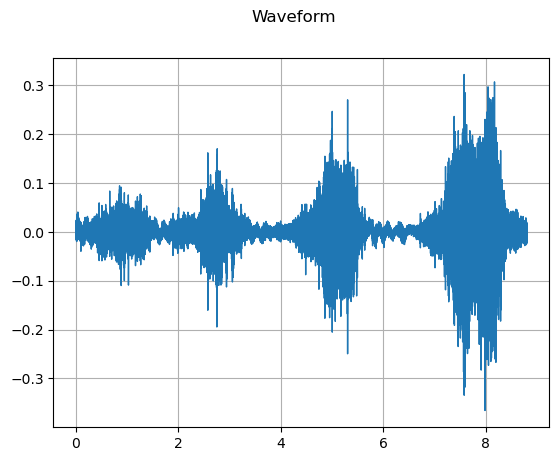

In [6]:
module_functions.plot_waveform(audio1, sample_rate)

## Conversión de señal de tiempo continuo a señal de tiempo discreto (Teorema Nyquist-Shannon)

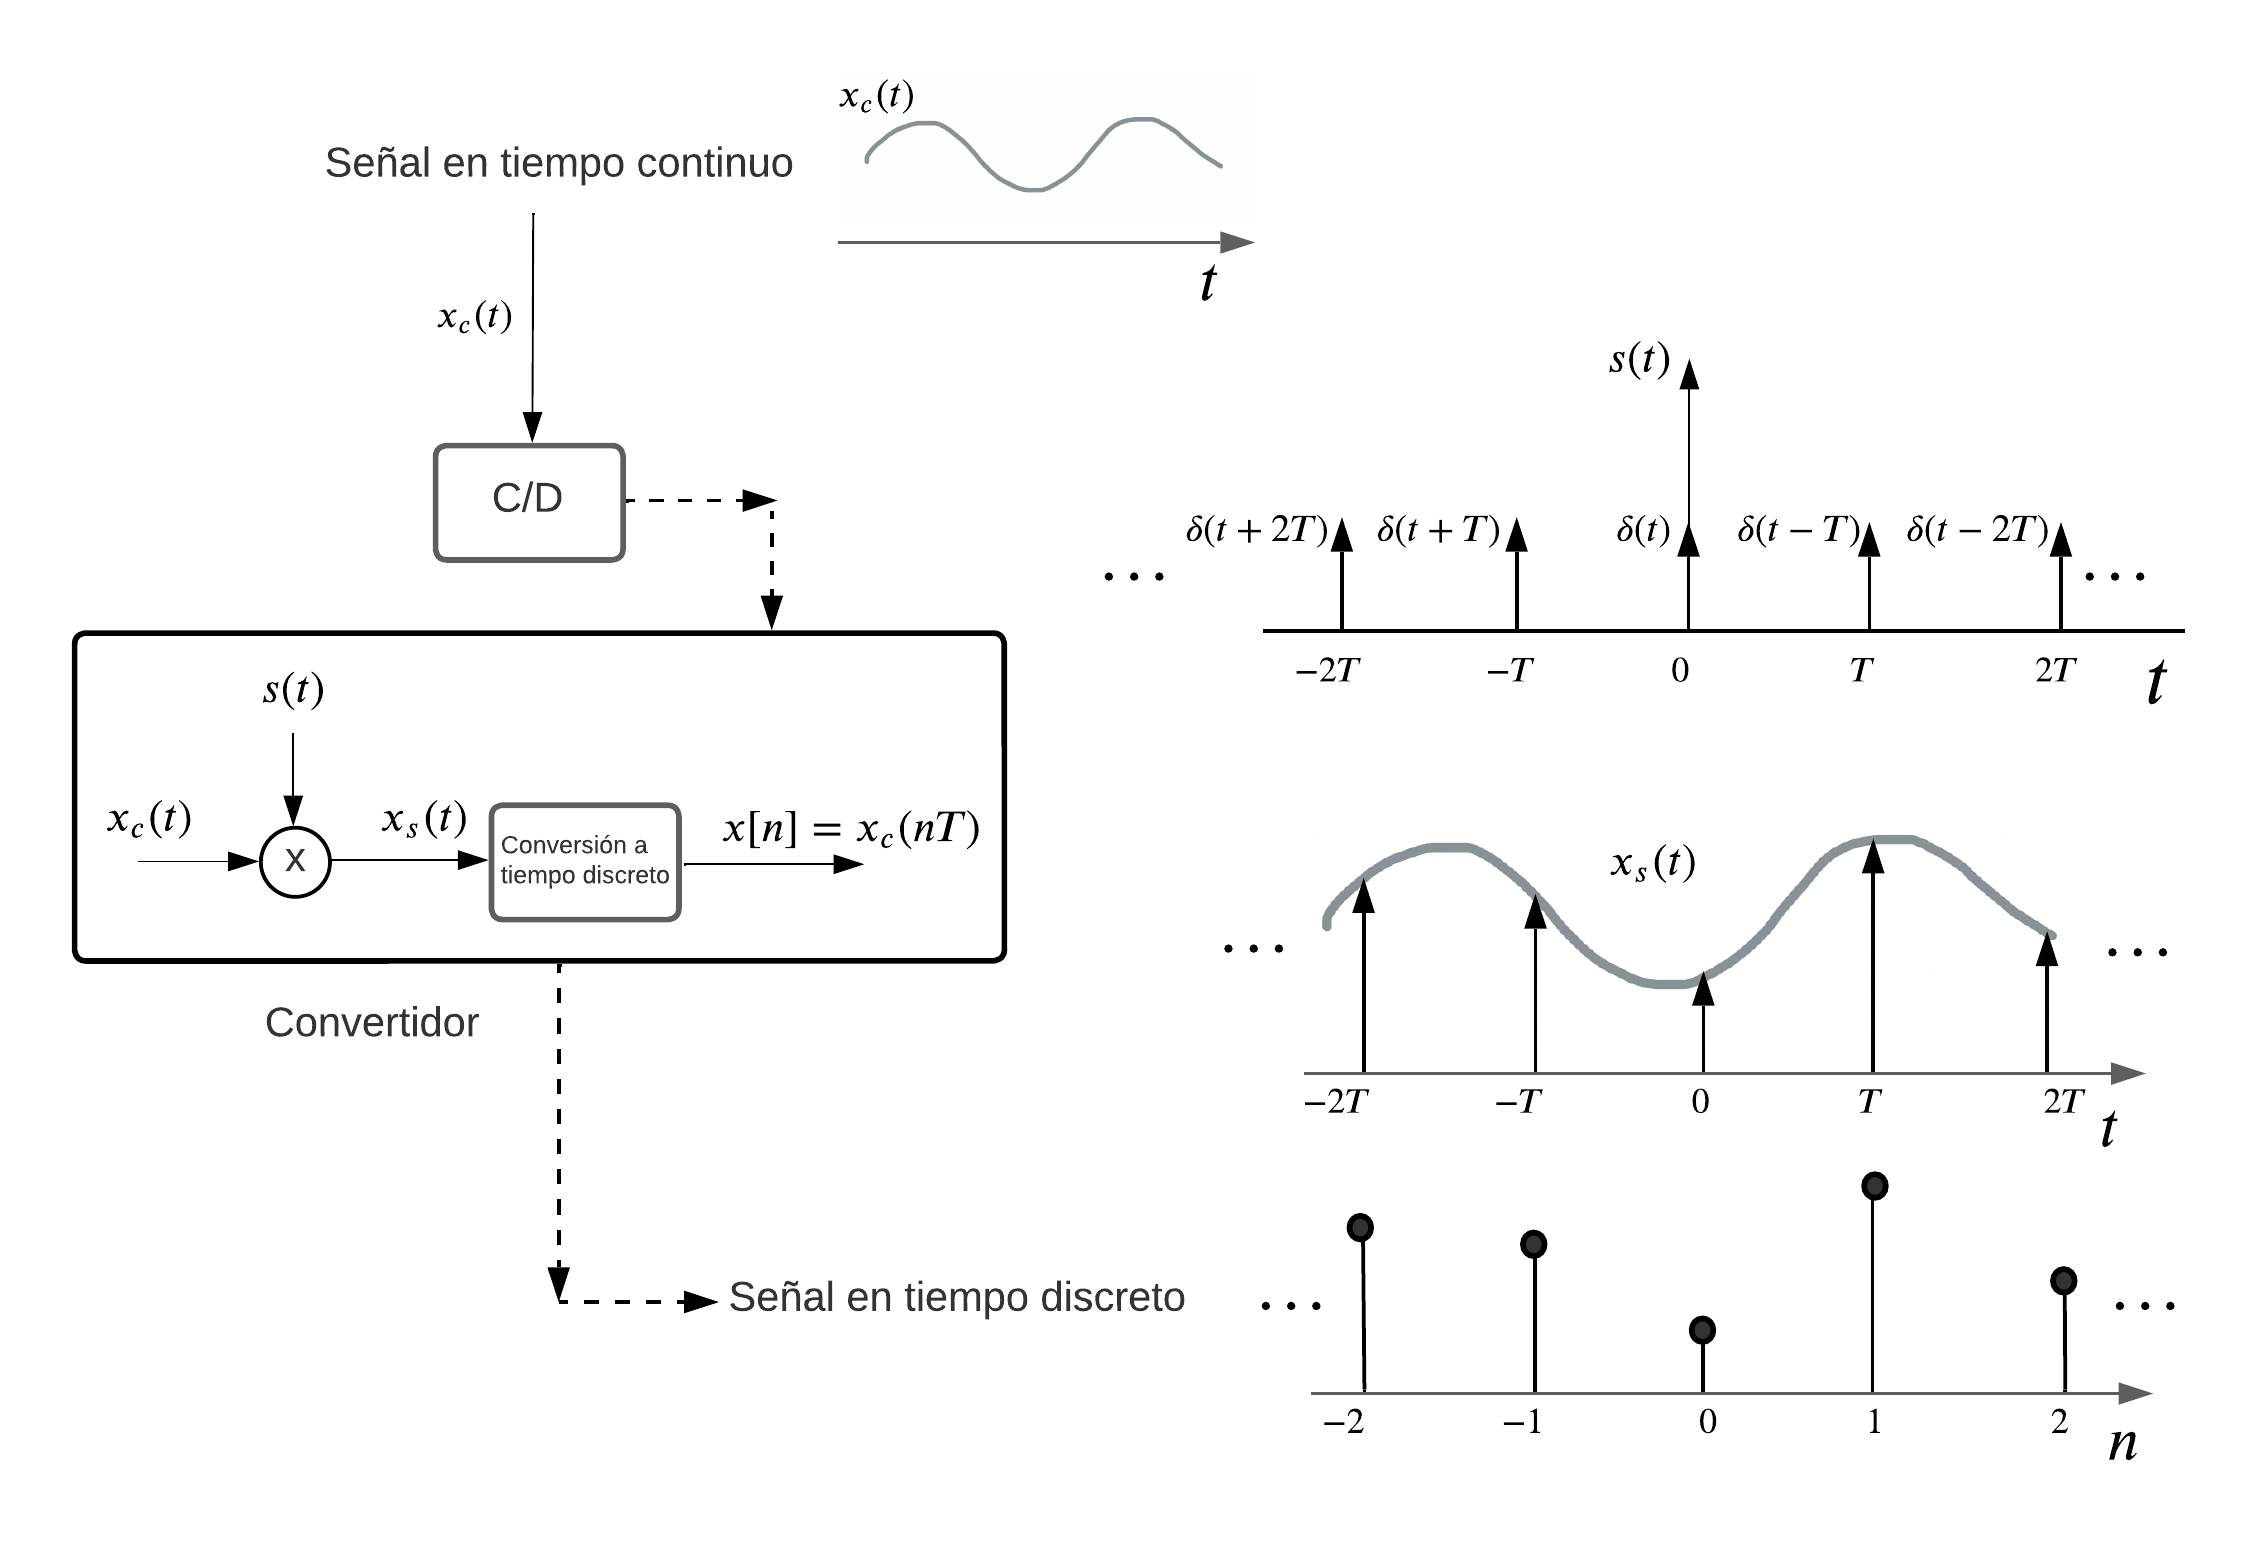

In [7]:
_SAMPLE_DIR_IMG  = "image_data"
img_path2 = os.path.join(_SAMPLE_DIR_IMG, "c_to_d.png")
os.makedirs(_SAMPLE_DIR_IMG, exist_ok=True)
display.Image(img_path2, width="700")

## Dominio tiempo

In [8]:
t = np.linspace(0, 5, 5001)   # Time, 0-5s with 5001 samples in the range

# Define the frequency and amplitude of the three components of the signal
A1 = 1.0                  # amplitude of first sine
w1 = 1.0 * (2 * np.pi)    # frequency of first sine (rad/s)
A2 = 2.5                  # amplitude of second sine
w2 = 2.0 * (2 * np.pi)   # frequency of second sine (rad/s)
A3 = 4.5                  # amplitude of third sine
w3 = 4.0 * (2 * np.pi)    # frequency of third sine (rad/s)

orig_signal = A1 * np.sin(w1 * t) + A2 * np.sin(w2 * t) + A3 * np.sin(w3 * t)

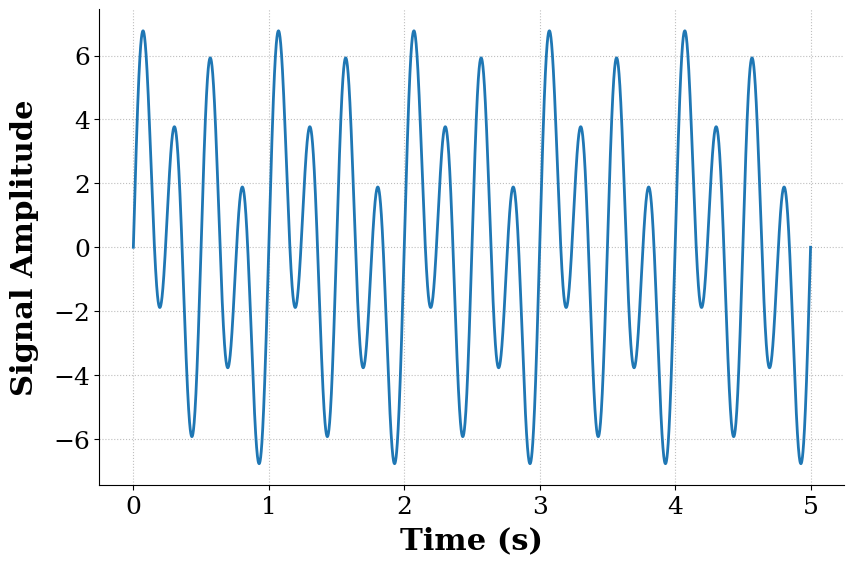

In [9]:
tools_functions.plot1(t, orig_signal)

In [10]:
t = np.linspace(0, 25, 5001)   # Time, 0-5s with 5001 samples in the range

# Now, define the 25s signal, using the same amplitudes and frequencies as the 5s version
orig_signal_25s = A1 * np.sin(w1 * t) + A2 * np.sin(w2 * t) + A3 * np.sin(w3 * t)

## Dominio frecuencia

In [11]:
# Calculate the FFT for the 25s signal
freq_25s, mag_25s = tools_functions.compute_fft_n(orig_signal_25s, t, False)

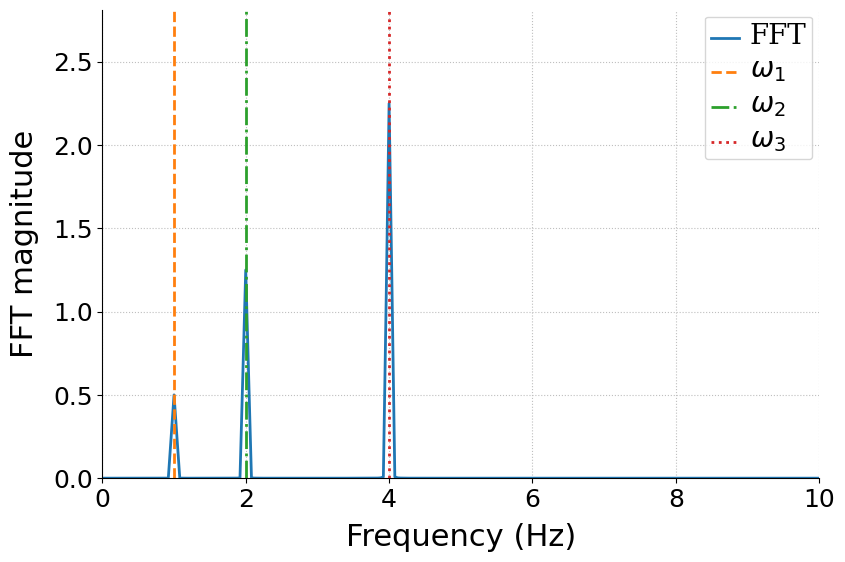

In [12]:
tools_functions.plot2(freq_25s, mag_25s, w1, w2, w3)

In [13]:
audio_path_bass  = os.path.join(_SAMPLE_DIR_AUD, "bass.wav")
audio_path_drums = os.path.join(_SAMPLE_DIR_AUD, "drums.wav")
audio_path_piano = os.path.join(_SAMPLE_DIR_AUD, "piano.wav")
audio_path_voice = os.path.join(_SAMPLE_DIR_AUD, "voice.wav")

audio_bass, sample_rate  = torchaudio.load(audio_path_bass)
audio_drums, sample_rate = torchaudio.load(audio_path_drums)
audio_piano, sample_rate = torchaudio.load(audio_path_piano)
audio_voice, sample_rate = torchaudio.load(audio_path_voice)

In [14]:
audio_bass, sample_rate = torchaudio.load(audio_path_bass)
Audio(audio_bass.numpy()[0], rate=sample_rate)

In [15]:
audio_drums, sample_rate = torchaudio.load(audio_path_drums)
Audio(audio_drums.numpy()[0], rate=sample_rate)

In [16]:
audio_piano, sample_rate = torchaudio.load(audio_path_piano)
Audio(audio_piano.numpy()[0], rate=sample_rate)

In [17]:
audio_voice, sample_rate = torchaudio.load(audio_path_voice)
Audio(audio_voice.numpy()[0], rate=sample_rate)

In [18]:
orig_mixed = audio_voice + audio_piano + audio_drums + audio_bass
Audio(orig_mixed.numpy()[0], rate=sample_rate)

In [20]:
path = f"mix_rapsodia.wav"
torchaudio.save(path, orig_mixed, sample_rate)
inspect_file(path)

NameError: name 'inspect_file' is not defined